In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

In [2]:
path1 = '/Users/kimtaehyeong/Desktop/01_앞면_윗니 오른쪽'
os.chdir(path1)
files1 = os.listdir(path1) # 파일 폴더명 반환

data = []
for file in files1:
    f = cv2.imread(file)
    data.append(f)


In [3]:
len(data)

2687

In [4]:
# train, test 나누기
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, 
                               test_size=0.15,
                               shuffle=True,
                               random_state=42)

In [5]:
print(len(train))
print(len(test))

2283
404


In [6]:
# Train outlier data load
path1 = '/Users/kimtaehyeong/Desktop/아웃라이어'
os.chdir(path1)
files1 = os.listdir(path1)

for file in files1:
    f = cv2.imread(file)
    train.append(f)

In [7]:
path2 = '/Users/kimtaehyeong/Desktop/테스트 이상치'
os.chdir(path2)
files2 = os.listdir(path2)

for file in files2:
    f = cv2.imread(file)
    test.append(f)

In [8]:
print('Train: ', len(train))
print('Test: ', len(test))

Train:  2287
Test:  422


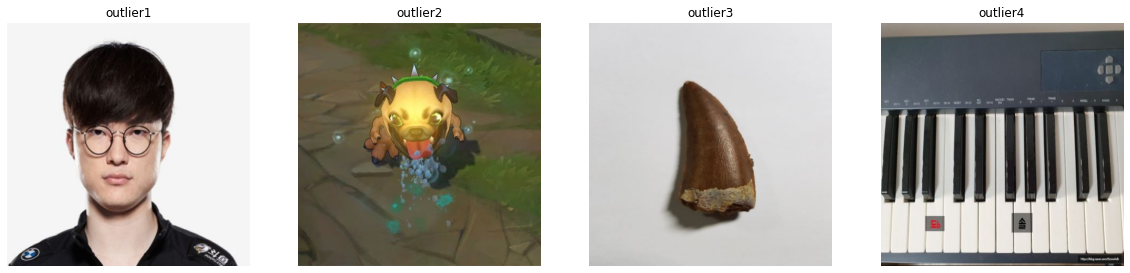

In [9]:
# Train 이상치
plt.figure(figsize=(20,8))

for i in range(1,5):
    plt.subplot(1,4,i)
    plt.imshow(cv2.cvtColor(train[-i], cv2.COLOR_BGR2RGB))
    plt.title(f'outlier{i}')
    plt.axis('off')
plt.show()

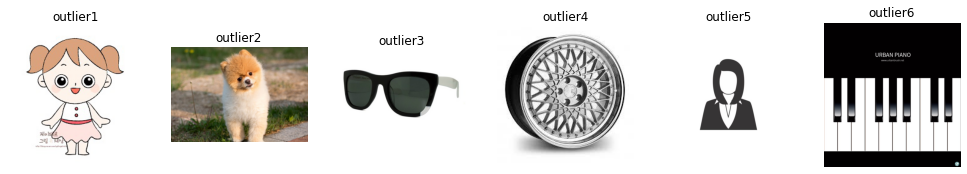

In [10]:
# test 이상치
plt.figure(figsize=(20,7))

for i in range(1,7):
    plt.subplot(1,7,i)
    plt.imshow(cv2.cvtColor(test[-i], cv2.COLOR_BGR2RGB))
    plt.title(f'outlier{i}')
    plt.axis('off')

plt.show()

In [11]:
test2 = test.copy()

In [12]:
# image resize
def image_resize(data_set, n_pixel):
    # create empty list
    resized_list = []
    # resize to n pixel 
    for i in range(len(data_set)):
        resized = cv2.resize(data_set[i], dsize=(n_pixel,n_pixel), interpolation=cv2.INTER_CUBIC)
        resized_list.append(resized)
        
    return resized_list

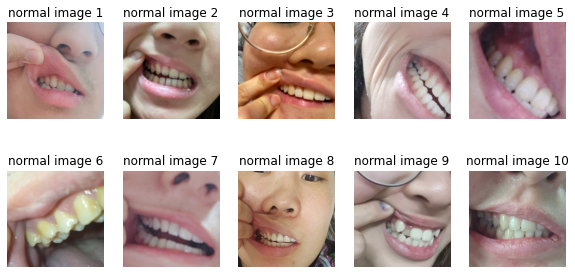

In [13]:
# 데이터 시각화
plt.figure(figsize = (10,5))

for i in range(1,10+1):
    plt.subplot(2,5,i)
    plt.imshow(cv2.cvtColor(train[i], cv2.COLOR_BGR2RGB))
    plt.title(f'normal image {i}')
    plt.axis('off')

In [14]:
train = image_resize(train, 224)

In [15]:
test = image_resize(test, 224)

In [16]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
model.summary()

2021-11-07 19:44:07.862266: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-07 19:44:07.863008: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (N


https://subinium.github.io/Keras-5-2/

In [17]:
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import numpy as np
from matplotlib import pyplot
from numpy import expand_dims

2021-11-07 19:44:12.827395: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-07 19:44:12.832623: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-07 19:44:12.925977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


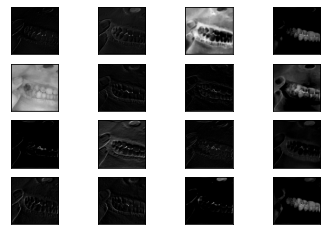

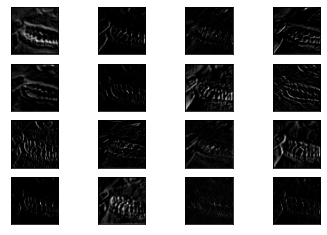

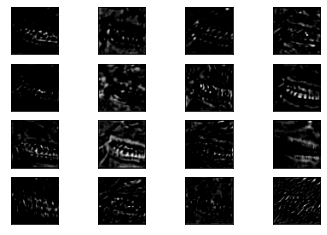

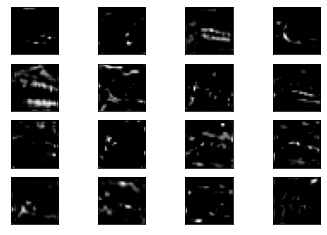

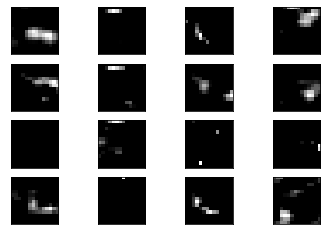

In [18]:
# load model
model = VGG16()
# redefine model 
ixs = [2,5,9,13,17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image 요구된조건으로
img = train[0]
#expand dimensions
img = expand_dims(img, axis=0)
img =preprocess_input(img)
# 피쳐맵을 돌려보자
feature_maps = model.predict(img)
# 시각화 시작
square = 4
for fmap in feature_maps :
    # plot all 64 maps in an 8*8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, : , :, ix-1], cmap='gray')
            #pyplot.imshow(fmap[0, :, :, ix-1], cmap=plt.cm.0ranges)
            ix += 1
            
    pyplot.show()

In [19]:
from keras.layers import ZeroPadding2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Conv2D
from keras.applications import vgg16
from keras import models

In [20]:
from keras.applications.vgg16 import VGG16
# 모델 불러오기
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
conv_layers.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers.layers:
    layer.trainable = False
    
# 새로운 모델 생성
model = models.Sequential()

# 모델 컨볼루션 추가
model.add(conv_layers)
model.add(Conv2D(filters=1024, kernel_size=(3,3),padding='same', 
                activation='relu'))
model.add(GlobalAveragePooling2D())

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
def create_fmap(data_set):
    fmap_list = []
    for i in range(len(data_set)):
        img = data_set[i]
        img = expand_dims(img, axis=0)
        img = preprocess_input(img)
        
        fmap = model.predict(img)
        fmap_list.append(fmap)
    return fmap_list

In [22]:
train_fmap = create_fmap(train)

2021-11-07 19:44:14.617076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [23]:
test_fmap = create_fmap(test)

In [24]:
train = np.array(train_fmap)
test = np.array(test_fmap)

In [25]:
print(train.shape)
print(test.shape)

(2287, 1, 1024)
(422, 1, 1024)


In [27]:
train2d = train.reshape(2287,-1)
test2d = test.reshape(422,-1)

In [28]:
print(train2d.shape)

(2287, 1024)


In [29]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100,
                          max_samples=100,
                          max_features=3,
                          contamination='auto',
                          random_state=42)
iforest.fit(train2d)
pred = iforest.predict(test2d)

In [30]:
import pandas as pd

result = pd.DataFrame(pred, columns=['value'])
result.head()

,value
0,1
1,1
2,1
3,1
4,1


In [31]:
outlier = result[result.value==-1].index
outlier

Int64Index([  7,  11,  14,  15,  36,  61,  81,  82, 118, 129, 138, 148, 165,
            199, 222, 237, 240, 266, 269, 274, 275, 280, 285, 297, 305, 331,
            333, 341, 343, 344, 361, 392, 402, 404, 405, 406, 407, 408, 409,
            410, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421],
           dtype='int64')

/var/folders/f4/fb3b_sqx3rvc3gfr73v6ck_00000gn/T/ipykernel_25554/4268629402.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n,n,i+1)


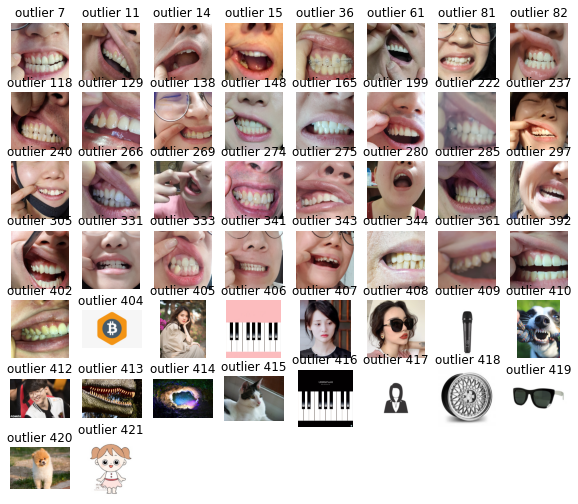

In [32]:
plt.figure(figsize=(10,10))

for i in range(len(outlier)):
    n = np.ceil(np.sqrt(len(outlier)))
    plt.subplot(n,n,i+1)
    plt.imshow(cv2.cvtColor(test2[outlier[i]], cv2.COLOR_BGR2RGB))
    plt.title(f'outlier {outlier[i]}')
    plt.axis('off')
    
plt.show()